# K-Means clustering-Customer Segmentation

K-Means clustering, which is an unsupervised machine learning algorithm used to group similar data points into clusters.

Partitions data into K clusters.

Each cluster has a centroid (center).

Each data point is assigned to the nearest centroid.

Centroids are updated iteratively to minimize the distance (inertia) from points to centroids.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv(r"C:\Users\suchi\Desktop\ELEVATE LABS\KMEANS\Mall_Customers.csv")
print(df.head())
print(df.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [3]:
df.drop('CustomerID', axis=1, inplace=True)


mapping gender 

In [4]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


selecting only number data types

In [5]:
X = df.select_dtypes(include=[np.number])


##Use Elbow Method to Find Optimal K

It helps find the optimal number of clusters (K) by:

Calculating inertia (sum of squared distances from points to centroids) for different values of K.

Plotting inertia vs K.

The "elbow point" is where inertia drops suddenly and then slows — it’s likely the best K.

INERTIA:Inertia measures how internally coherent the clusters are:

Lower inertia means better clustering (but not always).

Formula: sum of squared distances from each point to its closest centroid.



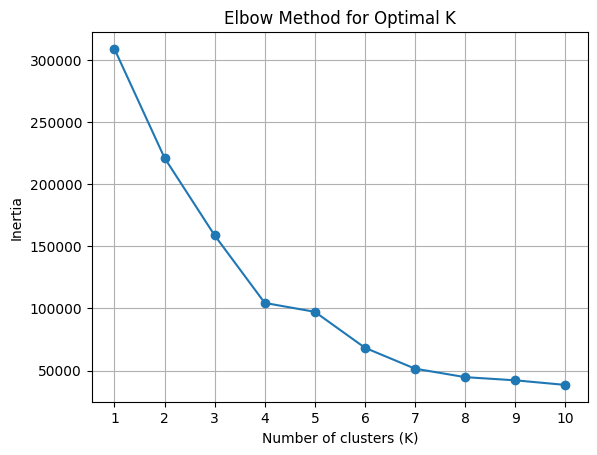

In [10]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid()
plt.show()


K=4: Still shows a noticeable drop from K=3, which means K=4 may still be combining more variation.

K=5: Has a relatively smaller drop — suggests clusters are getting tighter, and additional clusters aren’t helping much.

Apply K-Means with Optimal K

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to dataset
df['Cluster'] = cluster_labels
print(df['Cluster'])

0      2
1      2
2      0
3      2
4      0
      ..
195    1
196    3
197    1
198    3
199    1
Name: Cluster, Length: 200, dtype: int32


Visualize Clusters (Optional PCA for 2D)

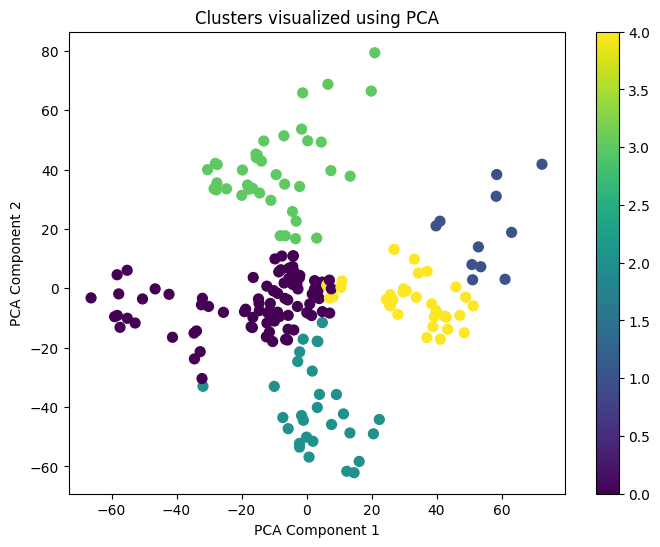

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('Clusters visualized using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


##Evaluate with Silhouette Score

It measures how well points are clustered:

Ranges from -1 to 1.

High score = good clustering (points are well-matched to their own cluster, and poorly matched to others).

In [15]:
score = silhouette_score(X, cluster_labels)
print(f'Silhouette Score: {score:.3f}')


Silhouette Score: 0.357
